### Unidad 1: Taller de resolución de problemas de clasificación automática

<h1> Notebook 1 - Regresión Lineal y Regresión logística</h1>


2020 - I semester <br>
INFO257 - Inteligencia Artificial<br>
Unidad 1 - Aprendizaje Supervisada<br>
Nicolás Treimún Cárdenas

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("SDSS-DR14.csv")
df[:20]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


### Analizando el dataset

En el actual dataset nos encontramos con 18 **features**, los cuales son los siguientes:


In [3]:
names=list(df.head(0))
print(names)

['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid']


**<h4>Significado de cada feature</h4>**

    Objid: Id del objeto.
    ra: Ascensión recta en grados.
    dec: Declinación en grados.
    u,g,r,i,z: magnitudes de los objetos en el SDSS. 
    run: Número del escaneo.
    rerun: tipo de escaneo (procesamiento). 
    camcol: Es la salida de una columna de cámara de CCD  como parte de un run. 
    field: Parte del camcol que es procesada por el photo pipeline. 
    specobjid: Una identificación única de 64 bits codificada en bits utilizada para objetos espectroscópicos ópticos.
    class: clase (GALAXY, QSO o STAR).
    redshift: Una medida de la velocidad de recesión de una galaxia u otro objeto del cielo.
    plate: Cada exposición espectroscópica emplea una placa metálica circular grande, delgada, que coloca las fibras ópticas a través de agujeros perforados en las ubicaciones de las imágenes en el plano focal del telescopio. 
    mjd: Fecha juliana modificada, utilizada para indicar la fecha en que se tomó una determinada pieza de datos SDSS (imagen o espectro).
    fiberid: Cada objeto tiene asignado un ID de fibra correspondiente.

#### Conversión de variable que queremos obtener

In [4]:
df["class"].replace({'STAR':0, 'GALAXY':1, 'QSO':2}, inplace=True)

Se clasificará a 'Star' = 0, 'Galaxy'=1, 'QSO'=2

Se realizará un reordenamiento del dataset de manera "random" para evitar problemáticas que provengan de el posicionamiento de los elementos.

In [5]:
from sklearn.utils import shuffle

df = shuffle(df, random_state=0)
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9394,1.237650e+18,173.701911,64.887104,18.88481,17.60499,17.07184,16.86107,16.74508,1302,301,4,345,3.743790e+18,0,-0.000696,3325,54942,633
898,1.237650e+18,223.322709,0.578090,19.29648,18.97669,18.79080,18.60685,18.37464,752,301,5,533,4.525180e+18,2,2.161713,4019,55363,682
2398,1.237650e+18,170.441639,-0.422159,19.13065,17.54826,16.65622,16.24163,15.90311,756,301,2,365,3.152900e+17,1,0.130865,280,51612,137
5906,1.237650e+18,180.917770,-0.608977,19.30394,17.89996,17.40038,17.21918,17.15916,756,301,2,435,3.256150e+18,0,0.000027,2892,54552,162
2343,1.237650e+18,162.081309,-0.017589,18.61642,17.18082,16.65869,16.46276,16.35942,756,301,3,309,2.881310e+18,0,-0.000101,2559,54208,486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1.237650e+18,165.519708,0.813790,18.09906,16.84019,16.33991,16.15955,16.08121,756,301,5,332,3.119990e+17,0,-0.000032,277,51908,454
4859,1.237650e+18,179.163249,-0.526699,19.04383,17.57419,16.70666,16.25977,15.88763,756,301,2,423,3.197670e+17,1,0.125285,284,51943,40
3264,1.237650e+18,133.253542,0.565068,18.83673,17.90111,17.59255,17.46506,17.45412,1239,301,5,86,4.295460e+18,0,0.000641,3815,55537,568
9845,1.237650e+18,223.889617,60.004615,19.38174,17.96103,17.26233,16.88625,16.63655,1345,301,5,484,6.847190e+17,1,0.105577,608,52081,624


In [6]:
Y = df["class"]
Y

9394    0
898     2
2398    1
5906    0
2343    0
       ..
9225    0
4859    1
3264    0
9845    1
2732    0
Name: class, Length: 10000, dtype: int64

In [7]:
X=df
X

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9394,1.237650e+18,173.701911,64.887104,18.88481,17.60499,17.07184,16.86107,16.74508,1302,301,4,345,3.743790e+18,0,-0.000696,3325,54942,633
898,1.237650e+18,223.322709,0.578090,19.29648,18.97669,18.79080,18.60685,18.37464,752,301,5,533,4.525180e+18,2,2.161713,4019,55363,682
2398,1.237650e+18,170.441639,-0.422159,19.13065,17.54826,16.65622,16.24163,15.90311,756,301,2,365,3.152900e+17,1,0.130865,280,51612,137
5906,1.237650e+18,180.917770,-0.608977,19.30394,17.89996,17.40038,17.21918,17.15916,756,301,2,435,3.256150e+18,0,0.000027,2892,54552,162
2343,1.237650e+18,162.081309,-0.017589,18.61642,17.18082,16.65869,16.46276,16.35942,756,301,3,309,2.881310e+18,0,-0.000101,2559,54208,486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1.237650e+18,165.519708,0.813790,18.09906,16.84019,16.33991,16.15955,16.08121,756,301,5,332,3.119990e+17,0,-0.000032,277,51908,454
4859,1.237650e+18,179.163249,-0.526699,19.04383,17.57419,16.70666,16.25977,15.88763,756,301,2,423,3.197670e+17,1,0.125285,284,51943,40
3264,1.237650e+18,133.253542,0.565068,18.83673,17.90111,17.59255,17.46506,17.45412,1239,301,5,86,4.295460e+18,0,0.000641,3815,55537,568
9845,1.237650e+18,223.889617,60.004615,19.38174,17.96103,17.26233,16.88625,16.63655,1345,301,5,484,6.847190e+17,1,0.105577,608,52081,624


Se eliminarán las siguientes columnas debido a que no son datos que aportan al analisis de los datos

In [8]:
X.drop(['objid', 'specobjid', 'mjd','fiberid','run','rerun'],axis=1,inplace=True)

#### Ahora analizaré si existe problema de desbalanceo en el dataset

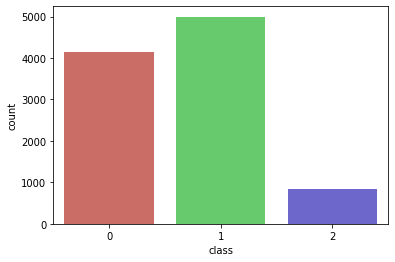

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.countplot(x='class',data=X, palette='hls')

#### Podemos observar que existe una gran diferencia entre los valores de 0(Star) y 1(Galaxia) en comparativa con 2(QSO)

Obviando el problema de desbalanceo que existe en el dataset verificaré que tan acertados serán los resultados obtenidos si aplicamos el algoritmo de regresión logística directamente. (Sin tratar el desbalanceo con tecnicas como disminuir las clases mayoritarias o replicar las minoritarias )

In [10]:
X

,ra,dec,u,g,r,i,z,camcol,field,class,redshift,plate
9394,173.701911,64.887104,18.88481,17.60499,17.07184,16.86107,16.74508,4,345,0,-0.000696,3325
898,223.322709,0.578090,19.29648,18.97669,18.79080,18.60685,18.37464,5,533,2,2.161713,4019
2398,170.441639,-0.422159,19.13065,17.54826,16.65622,16.24163,15.90311,2,365,1,0.130865,280
5906,180.917770,-0.608977,19.30394,17.89996,17.40038,17.21918,17.15916,2,435,0,0.000027,2892
2343,162.081309,-0.017589,18.61642,17.18082,16.65869,16.46276,16.35942,3,309,0,-0.000101,2559
...,...,...,...,...,...,...,...,...,...,...,...,...
9225,165.519708,0.813790,18.09906,16.84019,16.33991,16.15955,16.08121,5,332,0,-0.000032,277
4859,179.163249,-0.526699,19.04383,17.57419,16.70666,16.25977,15.88763,2,423,1,0.125285,284
3264,133.253542,0.565068,18.83673,17.90111,17.59255,17.46506,17.45412,5,86,0,0.000641,3815
9845,223.889617,60.004615,19.38174,17.96103,17.26233,16.88625,16.63655,5,484,1,0.105577,608


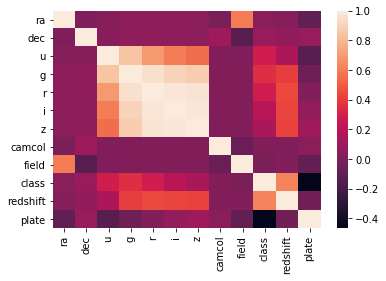

In [11]:
sb.heatmap(X.corr())

In [12]:
X.drop(['class'],axis=1, inplace=True)
X

,ra,dec,u,g,r,i,z,camcol,field,redshift,plate
9394,173.701911,64.887104,18.88481,17.60499,17.07184,16.86107,16.74508,4,345,-0.000696,3325
898,223.322709,0.578090,19.29648,18.97669,18.79080,18.60685,18.37464,5,533,2.161713,4019
2398,170.441639,-0.422159,19.13065,17.54826,16.65622,16.24163,15.90311,2,365,0.130865,280
5906,180.917770,-0.608977,19.30394,17.89996,17.40038,17.21918,17.15916,2,435,0.000027,2892
2343,162.081309,-0.017589,18.61642,17.18082,16.65869,16.46276,16.35942,3,309,-0.000101,2559
...,...,...,...,...,...,...,...,...,...,...,...
9225,165.519708,0.813790,18.09906,16.84019,16.33991,16.15955,16.08121,5,332,-0.000032,277
4859,179.163249,-0.526699,19.04383,17.57419,16.70666,16.25977,15.88763,2,423,0.125285,284
3264,133.253542,0.565068,18.83673,17.90111,17.59255,17.46506,17.45412,5,86,0.000641,3815
9845,223.889617,60.004615,19.38174,17.96103,17.26233,16.88625,16.63655,5,484,0.105577,608


Ahora tenemos a X preparado para aplicar el método de Regresión logística

In [13]:
x = X.iloc[:].values
y = Y.iloc[:].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)
print(X_train)

[[ 1.72099196e+02  6.80233447e+01  1.77951600e+01 ...  3.37000000e+02
  -6.47722000e-04  2.87300000e+03]
 [ 2.23213275e+02 -7.39941426e-01  1.82392800e+01 ...  5.32000000e+02
   7.73223900e-02  3.09000000e+02]
 [ 1.27285786e+02  4.85101717e+01  1.79135500e+01 ...  1.59000000e+02
  -5.90226000e-04  3.17400000e+03]
 ...
 [ 2.60142498e+02  5.26127027e+01  1.62928800e+01 ...  9.40000000e+01
  -1.74685000e-04  3.59000000e+02]
 [ 2.06314152e+02  1.43842455e-01  1.83575900e+01 ...  4.19000000e+02
   4.36000000e-05  4.04300000e+03]
 [ 1.43504711e+02  7.95083070e-01  1.79718900e+01 ...  1.85000000e+02
  -1.43071000e-04  3.82500000e+03]]


## Regresión logística

In [15]:
#Aprendizaje
LogReg = LogisticRegression(random_state=1,solver="newton-cg")
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

coeficientes del modelo: [[ 6.58350582e-04 -9.54605679e-03  2.49920920e+00 -4.38467551e+00
  -2.94393544e+00  1.08984853e+00  3.64858756e+00 -3.33393224e-04
   7.03689342e-04 -1.41370986e+01  6.53564020e-04]
 [ 2.11018769e-03  7.76026392e-03  7.52140759e-01  2.47212321e-01
   1.29990737e+00 -5.96504795e-01 -1.74278956e+00 -2.82000032e-02
  -5.56307453e-04  4.74097777e+00 -4.03217534e-04]
 [-2.76853827e-03  1.78579287e-03 -3.25134996e+00  4.13746318e+00
   1.64402808e+00 -4.93343732e-01 -1.90579799e+00  2.85333964e-02
  -1.47381887e-04  9.39612080e+00 -2.50346477e-04]]
intercept: [ 1.96989629  0.07790387 -2.04780016]


In [17]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array([0, 2, 0, ..., 1, 0, 2])

In [18]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1201,   40,    3],
       [  62, 1409,    4],
       [   2,   15,  264]])

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1244
           1       0.96      0.96      0.96      1475
           2       0.97      0.94      0.96       281

    accuracy                           0.96      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.96      0.96      0.96      3000



Los resultados obtenidos por el algoritmo de regresión logística con el dataset "desbalanceado" nos arrojan que nuestro algoritmo logró predecir correctamente un 96% de los casos testeados por lo que se podría considerar que es relativamente confiable.
Podemos considerar que el desbalance no era lo suficiente fuerte como para impactar de manera negativa los resultados del estudio, esto se aprecia en el recall y precision de las 3 clases.

## Árbol de decisión

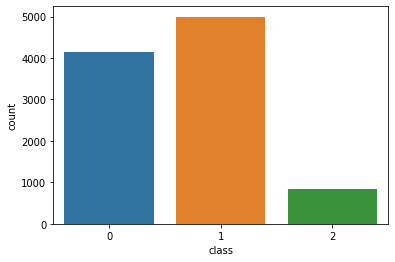

In [20]:
import seaborn as sns

df2 = pd.read_csv("SDSS-DR14.csv")
df2[:3]
df2["class"].replace({'STAR':0, 'GALAXY':1, 'QSO':2}, inplace=True)
df2 = shuffle(df2, random_state=0)

Y2 = df2["class"]
X2 = df2

X2.drop(['objid', 'specobjid', 'mjd','fiberid','run','rerun'],axis=1,inplace=True)


sns.countplot(x="class", data=df2)
plt.show()

In [21]:
df2.groupby('class').mean()

,ra,dec,u,g,r,i,z,camcol,field,redshift,plate
class,,,,,,,,,,,
0,172.962158,12.544824,18.330439,17.130547,16.732093,16.594047,16.531119,3.632225,303.552264,0.000043,2680.613198
1,177.333570,15.764372,18.804339,17.350216,16.649506,16.272770,16.017923,3.654662,300.963585,0.080325,477.680672
2,177.468000,20.570639,18.942928,18.678714,18.498535,18.360007,18.274761,3.694118,304.983529,1.218366,1285.305882


In [22]:
X2.drop(['class'],axis=1,inplace=True)

### Aprendizaje de árbol de decisión

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size = .3, random_state=25)

from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [24]:
#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1243    1    0]
 [   7 1450   18]
 [   0   26  255]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1244
           1       0.98      0.98      0.98      1475
           2       0.93      0.91      0.92       281

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [25]:
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()

features=['ra', 'dec', 'u', 'g', 'r', 'i', 
          'z', 'camcol', 'field', 'redshift','plate']
classes=['0','1','2']
tree.export_graphviz(clf,out_file=dot_data,feature_names=features,class_names=classes, filled=True, 
                     rounded=True, impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('modelo.png')


<img src="modelo.png">Modelo DecisionTree</img>

## Regresión lineal

In [26]:
from sklearn.preprocessing import StandardScaler
 
scale = StandardScaler()
X_scaled = scale.fit_transform(X[['ra', 'dec', 'u', 'g', 'r', 'i', 
          'z', 'camcol', 'field', 'redshift','plate']])
print(X_scaled)

[[-0.03825943  1.98528672  0.32035961 ...  0.26216397 -0.37149842
   1.04211167]
 [ 1.00024429 -0.56555029  0.81717684 ...  1.4185915   5.19090271
   1.43010535]
 [-0.106493   -0.6052255   0.61704761 ...  0.38518817 -0.03308208
  -0.66025253]
 ...
 [-0.88479522 -0.56606682  0.26233505 ... -1.33099949 -0.36806015
   1.31605533]
 [ 1.012109    1.79162127  0.92007148 ...  1.11718219 -0.09813057
  -0.476878  ]
 [ 0.48444557 -0.61282511 -1.71351724 ... -1.77388663 -0.36889252
   3.35162448]]


In [27]:
import statsmodels.api as sm

est = sm.OLS(Y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                  class   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              6534.
Date:                Sun, 31 May 2020   Prob (F-statistic):                        0.00
Time:                        14:37:29   Log-Likelihood:                         -2798.3
No. Observations:               10000   AIC:                                      5619.
Df Residuals:                    9989   BIC:                                      5698.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [28]:
# Funcion que permite modelar nuestra "curva" 
def predict_(pred,n):
    pred_ = 0.0002*pred[n][0] + 0.0014*pred[n][1] + -0.4785*pred[n][2] + 0.9368*pred[n][3] + 0.4526*pred[n][4] + -0.0463*pred[n][5] + -0.8252*pred[n][6] + 0.0049*pred[n][7] + -0.0001*pred[n][8] + 0.8072*pred[n][9] + -0.0001*pred[n][10]
    return pred_

In [29]:
# Funcion que realizará la predicion dentro de todo el dataset 
predicted_ = []

def predict_all(X_scaled):
    for n in range(0,len(Y)):
        predicted_.append(predict_(X_scaled,n))
    return predicted_

In [30]:
predicted_ = predict_all(X_scaled)

In [31]:
predicted_[0:20]

[-0.35296208519322064,
 4.7980994191562925,
 0.13909319261350148,
 -0.46999647590867366,
 -0.5180394789793994,
 -0.5657531187356887,
 -0.09409501606705359,
 -0.3179739393813964,
 -0.610216973693788,
 0.08563323725640892,
 -0.07833780698472677,
 -0.3790203830574656,
 -0.4018226134396038,
 3.2059494760339984,
 0.026537860945431237,
 -0.22550247868579065,
 -0.4657388422616092,
 0.023683176774235683,
 -0.2751758939492936,
 -0.0908095710572301]

Debido a que al utilizar el método de Linear Regression obtenemos un valores continuos, en comparativa con los 2 métodos utilizados anteriormente para clasificar (Logistic regression y Decision trees) no podrémos identificar de manera realmente clara cual es la categoría en la cual se clasifica cada clase. Por lo que se asumirá que los valores obtenidos representarán a la clase a la cual se encuentren mas cercana (0,1 o 2). Este criterio puede traer fallos para el sistema.

Se realizará la comparativa entre los resultados obtenidos y la clase real "y":

In [32]:
# Se realizará la conversion de valores obtenidos a escalares. (0,1 o 2) (acarrea fallos)
pred_class = []

def clasificador(predicted_):
    for x in range(len(predicted_)):
        if predicted_[x] < 0.5:
            pred_class.append(0)
        elif predicted_[x] <= 0.5 and abs(predicted_[x])<1.5:
            pred_class.append(1)
        else:
            pred_class.append(2)
            
clasificador(predicted_)

In [33]:
validate_ = y-pred_class
validate_[:20]

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [34]:
#Conteo de aciertos y fallos

acierto=0
fallo = 0

for k in range(len(validate_)):
    if validate_[k] == 0:
        acierto=acierto+1
    else:
        fallo=fallo+1

In [35]:
print("Aciertos: ",acierto)
print("Fallos: ",fallo)

Aciertos:  4956
Fallos:  5044


Podemos identificar de los resultados obtenidos que este método reflejó al rededor de un 50% de acierto. El mal funcionamiento de este algorítmo puede depender de varios factores, como son la conversión de los valores arrojados (funcion clasificador), la forma en la que se ha verificado el acierto, etc. pero tambien podemos observar un gran desacierto por el método linear regression. Esto ya que este algoritmo no se especializa en clasificar elementos, por lo que no identifica bien los límites de decisión, dando como resultado valores muy ambiguos para analizar.

### Conclusión

    - Tras implementar los métodos de Regresin lineal, Regresión logística y Árbol de decisión podemos observar que el algoritmo que obtuvo mejores resultados fue Decision tree con un 98% de accuracity, el cual fue seguido muy de cerca por Regresión logística con 96% de accuracity, y finalmente por Regresión lineal el cual obtuvo un pésimo rendimiento cercano al 50%. Esto tiene sentido ya que la función de los dos primeros métodos es clasificar valores mientras que el último tiene como finalidad proyectar un valor continuo, es decir, puede imitar un funcionamiento similar a los otros algoritmos pero al no contar con detalles como la función sigmoid para identificar claramente la clase buscada generará sutiles fallos los cuales harán la diferencia entre los resultados obtenidos.
    - Hay que considerar que no se implementó ningún método para tratar el desbalanceo del dataset, esto debido a que este no era lo suficientemente importante como para generar un impacto negativo en nuestros algoritmos al momento de identificar la clase menos concurrida (QSO).
